<h1>Table of Contents &lt;br&gt;&lt;/br&gt;<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
# Display plots inline
%matplotlib inline

# Autoreload all package before excecuting a call
%load_ext autoreload
%autoreload 2

In [2]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from evsim.data import loader

__EPEX Intraday continous market__

- Continuous trading 7 days a week, 24 hours a day, all year around  
- Hourly contracts for the next day open at 15:00 pm (d-1) for DE, FR, CH & AT 
- Hourly contracts for the next day open at 2.00 pm (d-1) for NL & BE 
- 30-min contracts for the next day open at 15:30 (d-1) for CH, DE, FR 


- **15-min contracts for the next day open at 4.00 pm (d-1)**
- **LEAD TIME: 5 Minutes, Clearing every 15 Min**
- Till when do we trade when we assume average clearing prices?

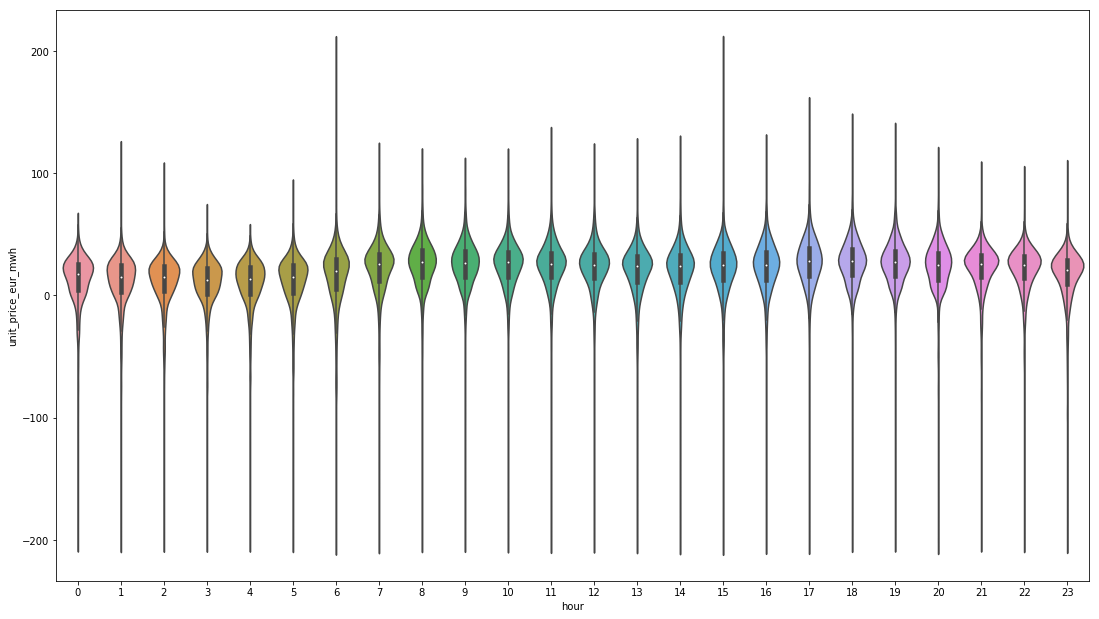

In [4]:
df = loader.load_intraday_prices()
df["hour"] = df["delivery_date"].dt.hour

# Clip for better visibility of plots
df["unit_price_eur_mwh"] = df["unit_price_eur_mwh"].clip(-200,200)

f, ax = plt.subplots(1, 1)
f.set_size_inches(18.5, 10.5)
sns.violinplot(x="hour", y="unit_price_eur_mwh", data=df, ax=ax);

In [5]:
q = pd.read_pickle("../data/processed/procom_Q.pkl")
                 
q[q["exec_time"] > '2018-01-29 18:55:00'].head(100)

,id,exec_time,rev,unit_price,qty,order_id,barea,sarea,market_area,delivery_date,product,product_time
9675490,9675491,2018-01-29 19:06:59,1,-320,5000,1035213546,10YDE-EON------1,10YDE-EON------1,DE_AT,2018-01-29,Q,20Q2
9675491,9675492,2018-01-29 19:09:13,1,-1000,3000,1035213571,10YDE-VE-------2,10YDE-VE-------2,DE_AT,2018-01-29,Q,20Q2
9675492,9675493,2018-01-29 19:09:13,1,-200,3000,1035213572,10YDE-ENBW-----N,10YDE-ENBW-----N,DE_AT,2018-01-29,Q,20Q2
9675493,9675494,2018-01-29 19:09:24,1,-1000,3000,1035213574,10YDE-VE-------2,10YDE-VE-------2,DE_AT,2018-01-29,Q,20Q2
9675494,9675495,2018-01-29 19:09:25,1,-200,3000,1035213575,10YDE-ENBW-----N,10YDE-ENBW-----N,DE_AT,2018-01-29,Q,20Q2
9675660,9675661,2018-01-29 18:55:04,1,120,600,1035213276,10YDE-RWENET---I,10YDE-RWENET---I,DE_AT,2018-01-29,Q,20Q3
9675661,9675662,2018-01-29 18:55:17,1,30,700,1035213282,10YDE-RWENET---I,10YDE-VE-------2,DE_AT,2018-01-29,Q,20Q3
9675662,9675663,2018-01-29 18:55:22,1,100,1500,1035213284,10YDE-RWENET---I,10YDE-VE-------2,DE_AT,2018-01-29,Q,20Q3
9675663,9675664,2018-01-29 18:55:22,1,50,200,1035213283,10YDE-RWENET---I,10YDE-ENBW-----N,DE_AT,2018-01-29,Q,20Q3
9675664,9675665,2018-01-29 18:55:31,1,90,600,1035213290,10YDE-RWENET---I,10YDE-RWENET---I,DE_AT,2018-01-29,Q,20Q3
